## BT4211 Group 9 Hotel Project 

### Jupyter Notebook to: 
- Clean Data 
- Perform EDA

### Project Setup 

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import pycountry_convert as pc

In [5]:
hotel_df = pd.read_excel("HotelCustomersDataset.xlsx")
hotel_df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
hotel_df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: o

In [7]:
hotel_df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# How many nationalities are there :o 
len(hotel_df["Nationality"].unique())


188

In [9]:
# Are all entries unique ppl? 
len(hotel_df["NameHash"].unique())
# Not all unique leh... Need to look into this further

80642

### Data Cleaning

In [10]:
# Drop all rows with NA (we already have enough datapoints)
hotel_df.dropna(inplace = True)

In [11]:
# What to do with nationality? Maybe can group into European and Non European?
def get_continent(alpha_3): 
    # Countries which either dont have alpha 2 or no matching continent just go under "Other"
    try: 
        alpha_2 = pc.country_alpha3_to_country_alpha2(alpha_3)
        continent = pc.country_alpha2_to_continent_code(alpha_2)
    except KeyError: 
        continent = "Other"
    return continent

# Adding extra column to indicate if the person is a domestic traveller (from Portugal) or otherwise
def get_domestic_traveller(alpha_3): 
    return 1 if alpha_3 == "PRT" else 0


hotel_df["Domestic_Traveller"] = hotel_df["Nationality"].apply(lambda x: get_domestic_traveller(x))
hotel_df["Continent"] = hotel_df["Nationality"].apply(lambda x: get_continent(x))
hotel_df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Domestic_Traveller,Continent
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,1,EU
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,EU
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,EU
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,EU
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,0,0,0,0,0,0,0,0,0,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,EU
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,1,0,0,0,0,0,0,EU
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,EU
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,1,0,0,0,0,0,EU


In [12]:
# 1 hot encoding on the categorical variables (E.g. Distribution channel, market segement, continent)
hotel_df_encoded = pd.get_dummies(hotel_df, columns=['Continent', 'DistributionChannel', 'MarketSegment'])
hotel_df_encoded

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,False,False,False,False,False,True,False,False,False,False
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,False,True
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,False,False,True,False,False,False,False,False,False,True
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,False,True
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,True,False
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,False,False,True,False,False,False,False,False,True,False
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,True,False
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,False,False,True,False,False,False,False,False,True,False


In [13]:
# Remove negative ages 
# Also only want to capture those 18 and above, which are adults who are likely booking for themselves? 
hotel_df_encoded = hotel_df_encoded[hotel_df_encoded["Age"] >=18]
hotel_df_encoded

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,False,False,False,False,False,True,False,False,False,False
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,False,True
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,False,False,True,False,False,False,False,False,False,True
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,False,True
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83584,83585,ITA,52.0,0,0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...,0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...,116,336.9,105.5,0,...,False,False,True,False,False,False,False,False,True,False
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,True,False
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,False,False,True,False,False,False,False,False,True,False
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,True,False


In [14]:
# Drop duplicated rows 
hotel_df_encoded = hotel_df_encoded.drop_duplicates()
hotel_df_encoded

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,False,False,False,False,False,True,False,False,False,False
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,False,True
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,False,False,True,False,False,False,False,False,False,True
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,False,True
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83584,83585,ITA,52.0,0,0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...,0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...,116,336.9,105.5,0,...,False,False,True,False,False,False,False,False,True,False
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,True,False
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,False,False,True,False,False,False,False,False,True,False
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,True,False


### Exploratory Data Analysis + Plots

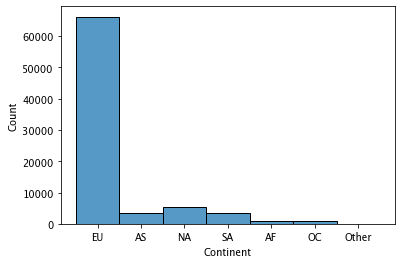

In [15]:
# See the spread of ppl across the continents
sns.histplot(hotel_df["Continent"])
plt.show()
# Very skewed, may have to take more balanced sample for training purposes? To consider

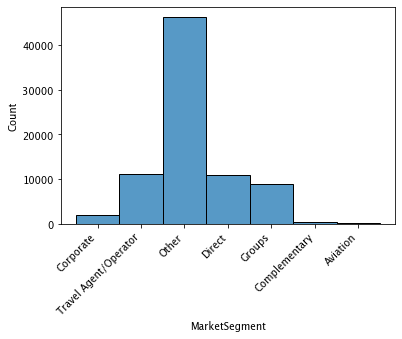

In [16]:
# See the spread of ppl across the various market segments 
sns.histplot(hotel_df["MarketSegment"])
plt.xticks(rotation=45, ha='right')
plt.show()
# Very skewed, may have to take more balanced sample for training purposes? To consider

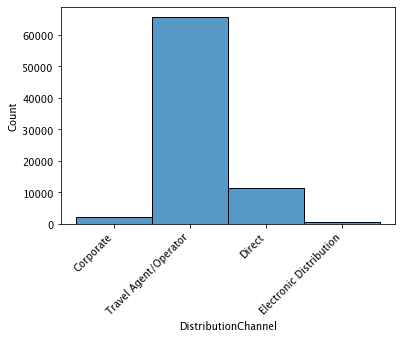

In [17]:
# See the spread of ppl across the various distribution channels
sns.histplot(hotel_df["DistributionChannel"])
plt.xticks(rotation=45, ha='right')
plt.show()

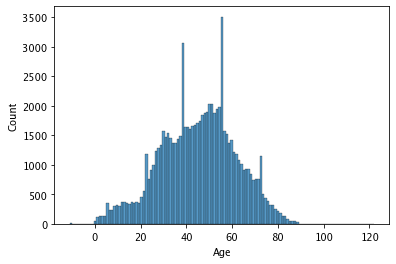

In [18]:
# See distribution of age
sns.histplot(hotel_df["Age"])
plt.show()

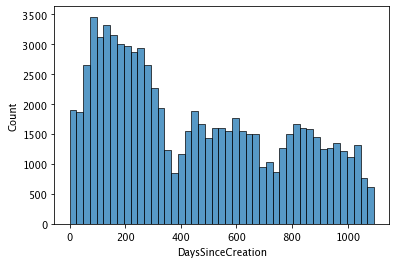

In [19]:
# See distribution of days since creation
sns.histplot(hotel_df["DaysSinceCreation"])
plt.show()

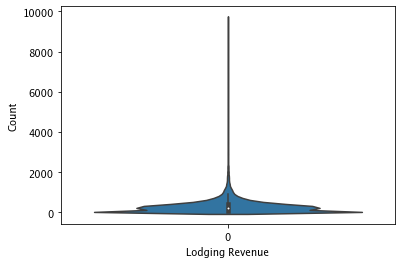

In [32]:
# See distribution of days since creation
sns.violinplot(hotel_df['LodgingRevenue']).set(
    xlabel = 'Lodging Revenue',
    ylabel = 'Count'
)
plt.show()

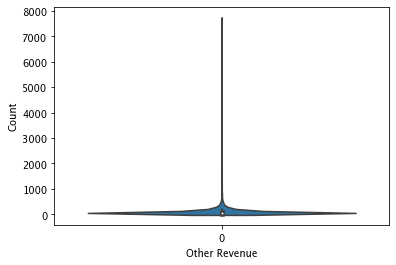

In [33]:
# See distribution of days since creation
sns.violinplot(hotel_df['OtherRevenue']).set(
    xlabel = 'Other Revenue',
    ylabel = 'Count'
)
plt.show()

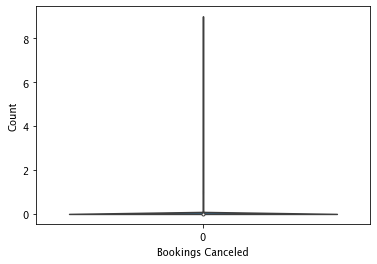

In [34]:
# See distribution of days since creation
sns.violinplot(hotel_df['BookingsCanceled']).set(
    xlabel = 'Bookings Canceled',
    ylabel = 'Count'
)
plt.show()

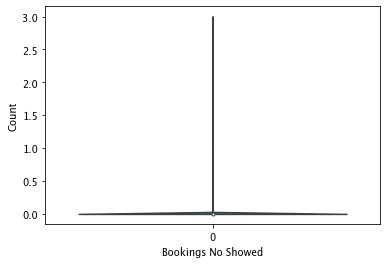

In [35]:
sns.violinplot(hotel_df['BookingsNoShowed']).set(
    xlabel = 'Bookings No Showed',
    ylabel = 'Count'
)
plt.show()

In [20]:
# See distribution of days since creation
# sns.histplot(hotel_df[])
# plt.show()

In [21]:
hotel_df_encoded.describe().T

# Negative values for days since last stay and days since first stay is ok, since -1 means the customer did not stay in the hotel
# Negative values for average lead time also means that the person never stayed in the hotel
# NameHash and DocID are still not unique but already removed duplicate rows so I think is ok

,count,mean,std,min,25%,50%,75%,max
ID,75397.0,41459.629853,23946.219003,1.0,20944.0,40781.0,61800.0,83589.00
Age,75397.0,47.439620,14.631540,18.0,36.0,48.0,58.0,122.00
DaysSinceCreation,75397.0,457.372482,310.607758,0.0,184.0,414.0,722.0,1095.00
AverageLeadTime,75397.0,69.406104,88.717833,-1.0,1.0,34.0,108.0,588.00
LodgingRevenue,75397.0,311.787922,365.144705,0.0,91.2,246.9,415.0,9682.40
OtherRevenue,75397.0,70.174372,112.928400,0.0,7.0,42.0,91.0,7730.25
BookingsCanceled,75397.0,0.001950,0.067813,0.0,0.0,0.0,0.0,9.00
BookingsNoShowed,75397.0,0.000610,0.029129,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,75397.0,0.826638,0.688431,0.0,1.0,1.0,1.0,66.00
PersonsNights,75397.0,4.875579,4.565214,0.0,1.0,4.0,8.0,116.00


### Output Modified DataFrame for Segmentation and Future Revenue Forecasting

In [22]:
# Output a cleaned excel file which can be used in both ML Tasks 
hotel_df_encoded.to_csv("HotelCustomersDataset_Cleaned.csv")